# TFIDF

In [16]:
# Importing the pandas library and assigning 'pd' for ease of use
import pandas as pd

# Loading File

In [17]:
# Assigning the file path to a variable named 'file'
file="C:\\Users\\tejas\\Downloads\\cricket_data.csv"

# Printing first 20 columns of dataset

In [18]:
# Reading the CSV file into a DataFrame
df=pd.read_csv(file)
# Displaying the first 20 rows of the DataFrame
df.head(20)

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
0,2024,Ruturaj Gaikwad,2,0,61,46,30.5,51,119.61,0,...,2,0,0,0,0,0,0,0,0,0
1,2023,Ruturaj Gaikwad,16,1,590,92,42.14,400,147.5,0,...,16,0,0,0,0,0,0,0,0,0
2,2022,Ruturaj Gaikwad,14,0,368,99,26.29,291,126.46,0,...,14,0,0,0,0,0,0,0,0,0
3,2021,Ruturaj Gaikwad,16,2,635,101*,45.35,466,136.26,1,...,16,0,0,0,0,0,0,0,0,0
4,2020,Ruturaj Gaikwad,6,2,204,72,51,169,120.71,0,...,6,0,0,0,0,0,0,0,0,0
5,2023,Devon Conway,16,2,672,92*,51.69,481,139.71,0,...,16,0,0,0,0,0,0,0,0,0
6,2022,Devon Conway,7,1,252,87,42,173,145.66,0,...,7,0,0,0,0,0,0,0,0,0
7,2024,MS Dhoni,2,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
8,2023,MS Dhoni,16,8,104,32*,26.00,57,182.46,0,...,16,0,0,0,0,0,0,0,0,0
9,2022,MS Dhoni,14,6,232,50*,33.14,188,123.40,0,...,14,0,0,0,0,0,0,0,0,0


# Printing stopwords

In [19]:
# Import the Natural Language Toolkit (NLTK) library
import nltk
# Downloading Stop Words
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'weren', 'and', 'during', 'am', 'shouldn', 'him', "you're", 'are', 'again', 'yours', 'over', 'me', 'no', 'having', 'very', 'o', 'same', 'further', 'ours', 'just', 'does', 'under', 'had', 'down', 'hasn', 'here', 'above', 'not', 'but', "you'd", 'be', "doesn't", 'being', 'his', 'will', 'haven', 's', 'should', 'couldn', "aren't", 'won', 'with', 'now', 'through', 'than', "you've", 'been', 'hadn', 'themselves', 'which', 'only', 'or', "weren't", 'when', 'there', 'each', 'd', 'its', 'while', 'doing', 'until', 't', 'both', 'those', 'an', "needn't", 'of', "didn't", "you'll", 'the', 'off', 'my', 'nor', 'shan', 'how', "haven't", "wouldn't", 'if', 'a', 'below', 'wouldn', "hadn't", 'll', 'up', 've', 'from', "mustn't", 'theirs', 'needn', 'ourselves', 'at', 'yourselves', 'was', 'don', 'few', 'too', 'between', "wasn't", 'her', 'your', "mightn't", 'our', 'itself', 'for', 'it', 'hers', 'more', 'out', 'about', 'didn', 'to', 'we', "it's", 'is', 'before', 'then', 'can', 'isn', "shan't", 'such', 'own', "she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Pre-Processing Pipeline

In [20]:
import regex as re

In [21]:
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

In [23]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['Player_Name'].apply(prepare, pipeline=pipeline)

# Token Frequency Analysis and Visualization

# Counting the Tokens

In [24]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name ='token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
sharma,79
yadav,45
singh,36
rahul,36
david,35
dhawan,23
khan,23
mayank,23
patel,23


# Drawing the word cloud

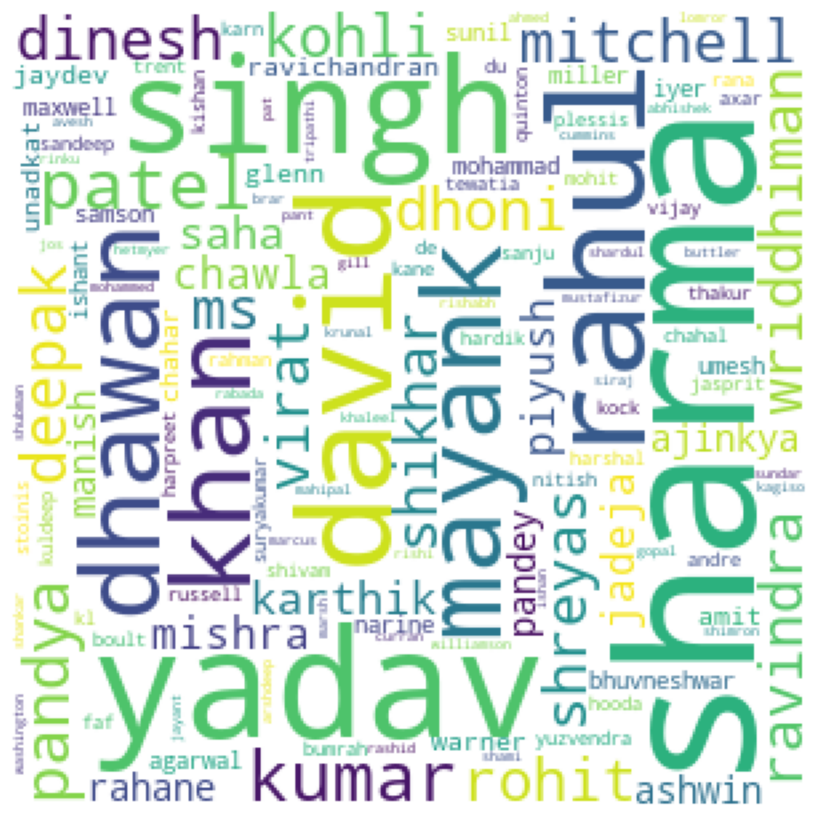

In [25]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Create a WordCloud object with desired parameters
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)

# Generate word cloud from the frequency dictionary
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# TFIDF and compare

In [26]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
# count tokens
    counter = Counter()
    df[column].map(update)
# create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [27]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
sharma,79,220.964510
yadav,45,151.191202
singh,36,128.986129
rahul,36,128.986129
david,35,126.389162


# Drawing Word Cloud

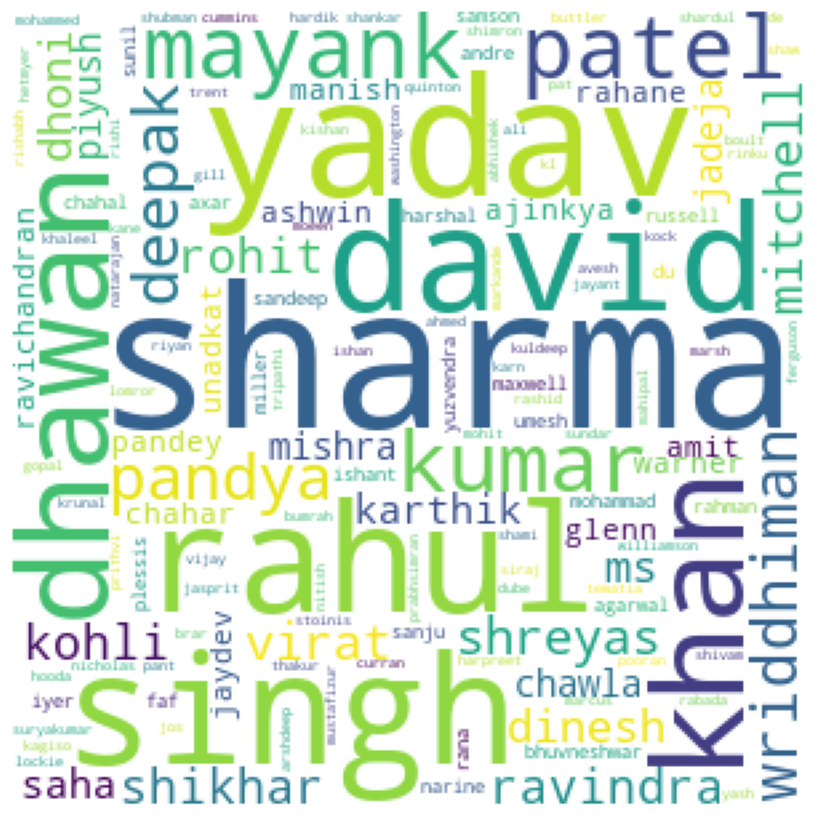

In [28]:
wc = WordCloud(background_color='white', width = 300, height=300,margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Function to count the keywords

In [29]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

# Function to group by year

In [30]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

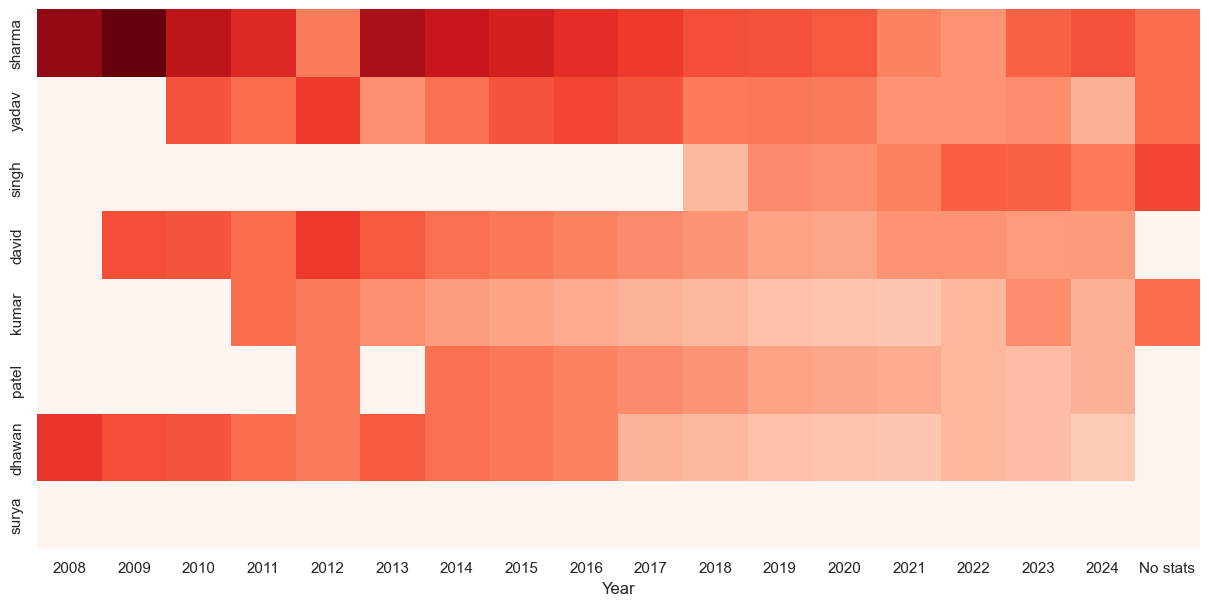

In [35]:
import seaborn as sns
keywords = ['sharma', 'yadav', 'singh', 'david', 'kumar', 'patel', 'dhawan', 'surya']
freq_df = count_keywords_by(df, by='Year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('Year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)